In [2]:
import pandas as pd
from selenium import webdriver   # selenium에서 사용할 웹 브라우더 인터페이스
from selenium.webdriver.common.by import By              # Web elements에 접근하기 위함.
from selenium.webdriver.common.keys import Keys          # 키입력 이벤트 처리에 필요.

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager # 크롬 드라이버 자동 업데이트을 위한 모듈
import time

In [17]:
options = Options()
options.add_experimental_option("detach", True)    # 브라우저 꺼짐 방지 옵션, 브라우저 종료하지않고 유지
service = Service(ChromeDriverManager().install())             # 크롬 드라이버 최신 버전 설정
driver = webdriver.Chrome(service=service, options=options)    # 사용할 웹 브라우저 선택 및 설정

url = "https://www.duksung.ac.kr/fund/devFundList.do"


driver.implicitly_wait(10)    #이벤트 발생에 따라 웹페이지 정보가 업데이터 되는 경우(새로고침) 특정시간을 최대로해서 기다리겠다....10초 동안 기다리는데 2초 안에 열리면 그냥 통과...
                              # implicitly_wait()와 time.sleep()차이
                              # - implicitly_wait(10)은 10초안에 웹페이를 load하면 바로 다음 코드로 넘어가거나 최대 10초까지 기다림.
                              # - time.sleep(10)은 10초안에 웹페이지가 load되더라도 무조건 10초 기다리고 다음 코드로 넘어감.
sleep_dutation = 0.3


driver.get(url)   # 해당 URL을 선택된 브라우저로 오픈...


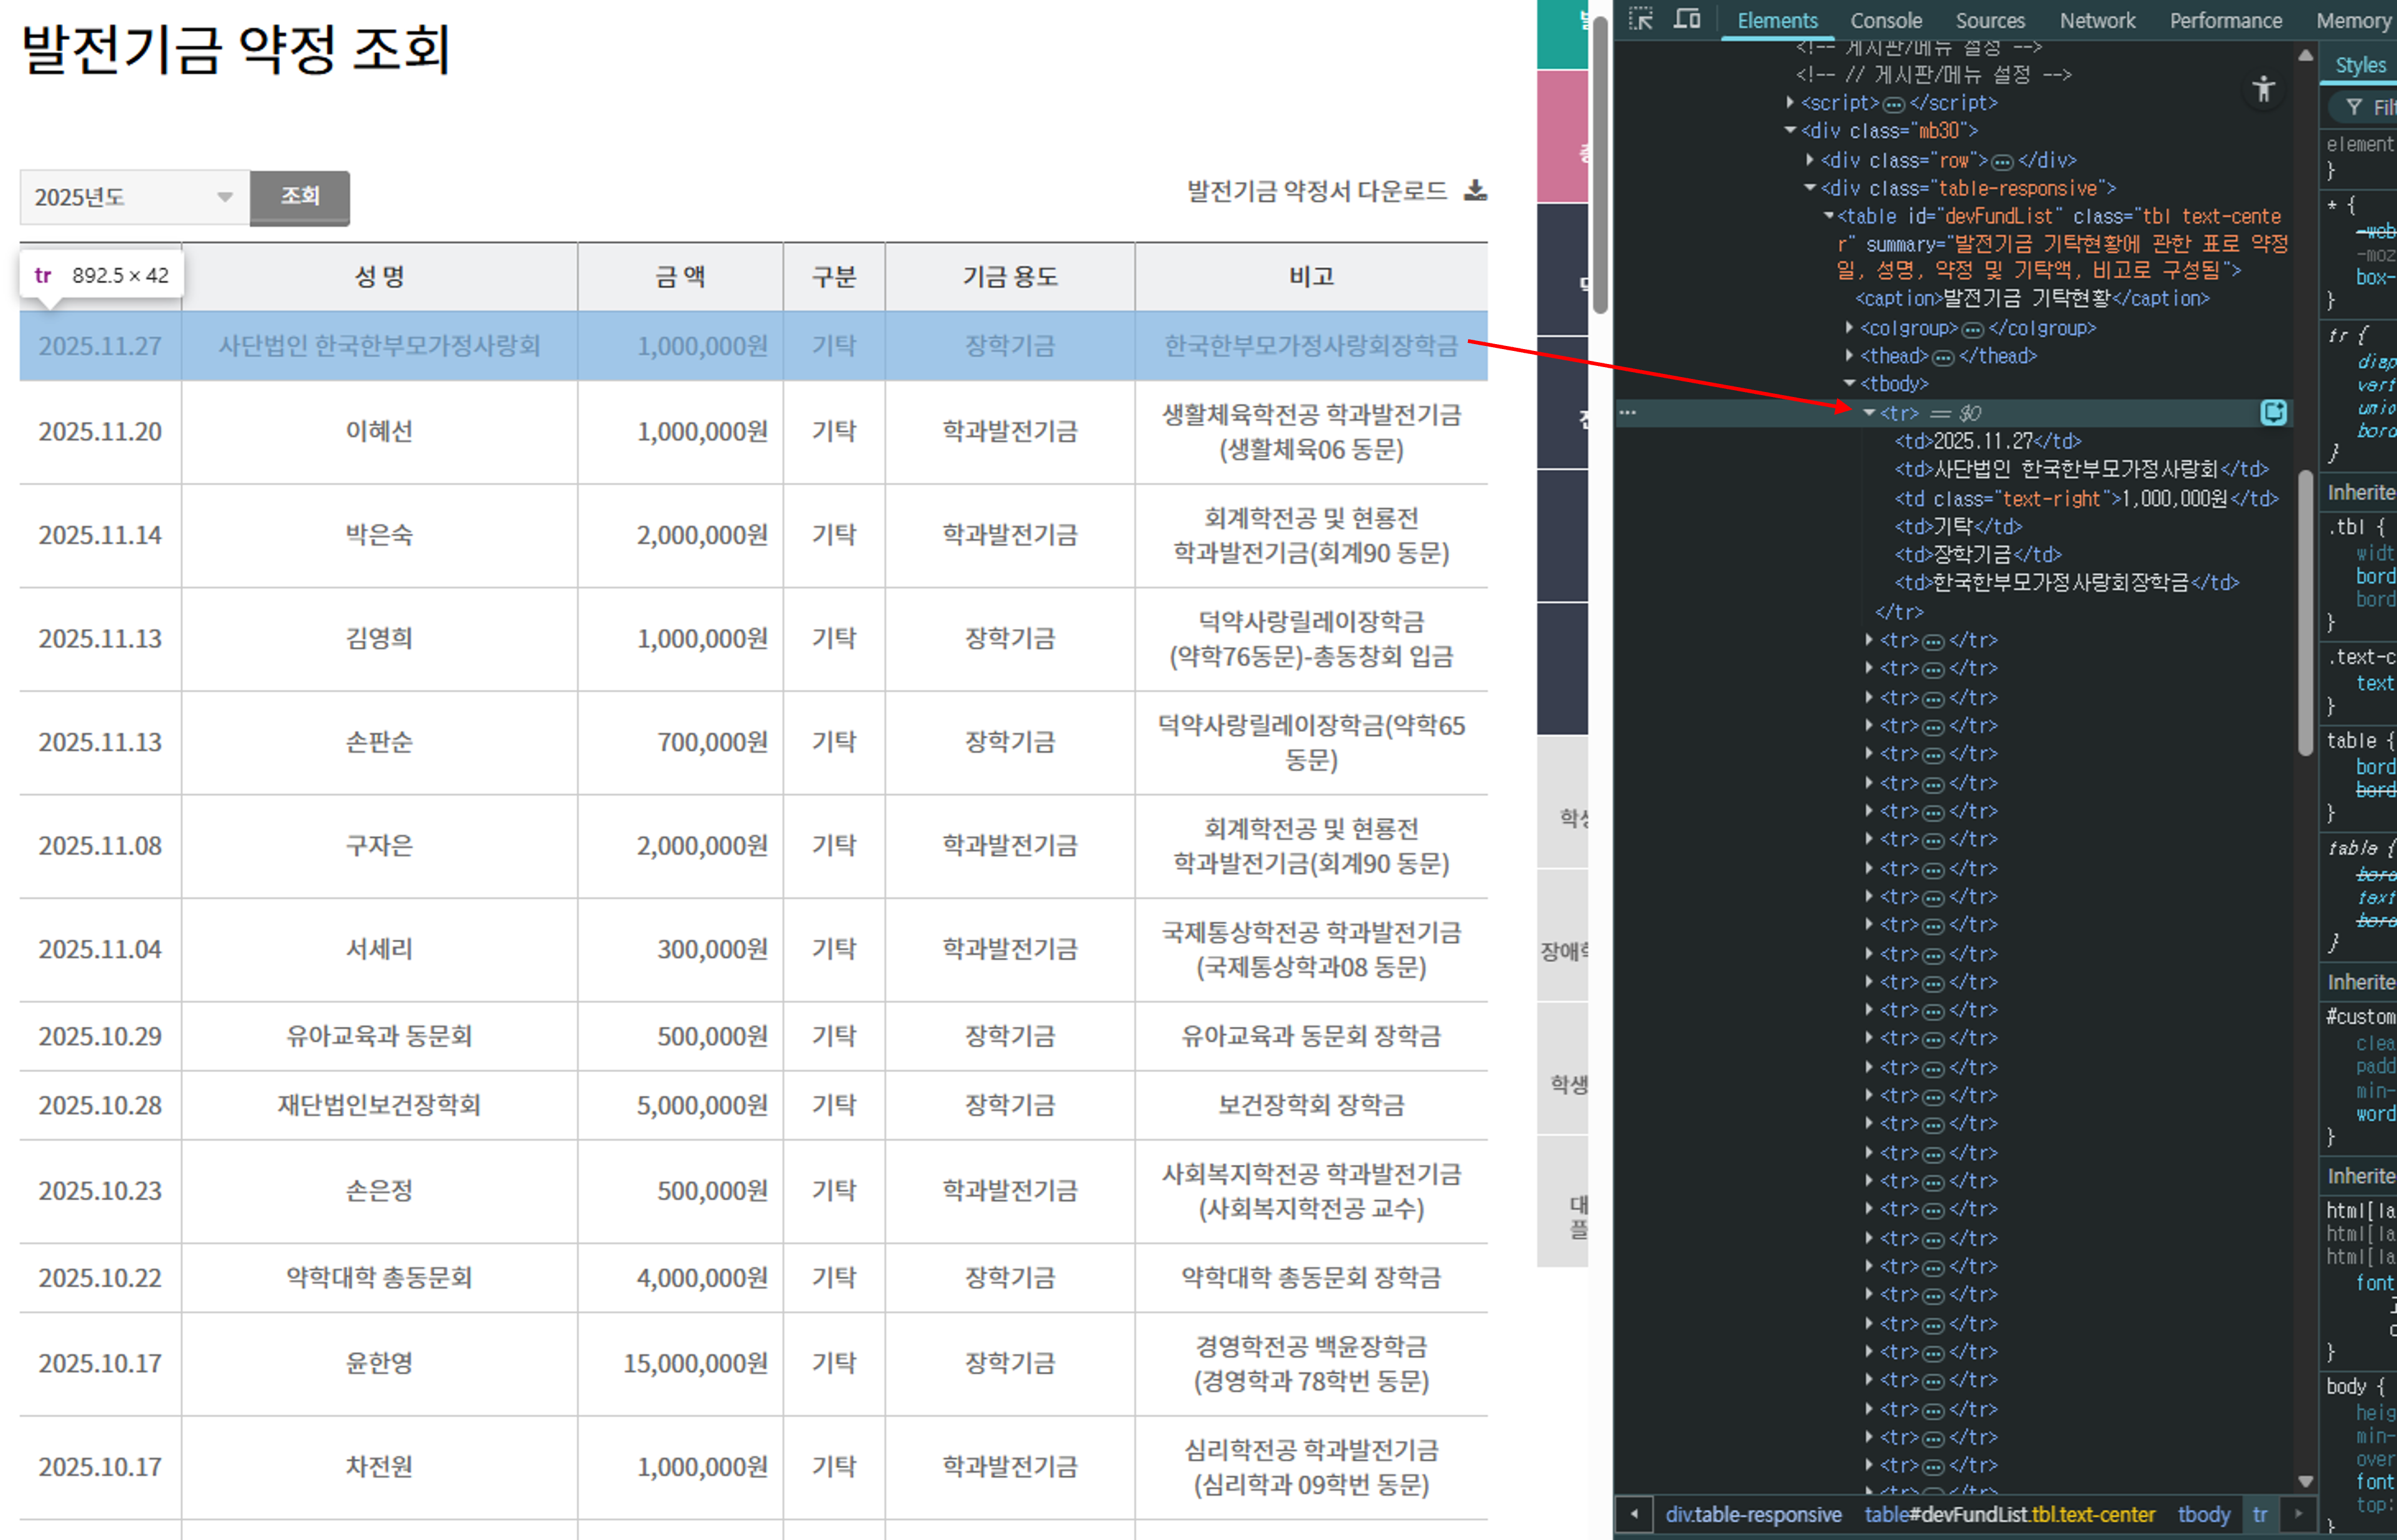

연도 선택박스만 클릭해서 갱신할 수 있다면......기부금 리스트에서는 "tr" tag에 있는 "td" tag  정보를 읽어보면 된다.
일단 tr, td를 가져와보자...

In [7]:
tr_list = driver.find_elements(By.CSS_SELECTOR, "#devFundList > tbody > tr")
print(len(tr_list)) # 몇개나있지?
print(tr_list[0])    # 첫번째 tr을 구경이나 해보자. 
                     # 뭔가 있긴 있구나...관련 tag가 없으면 erorr가 생길 것임.
                     # jupyter notebook은 코드 한줄 씩 실행 시킬 수 있어 편리한 부분이 있지만 debugging하기에는 까다롭다..
                     # vs code or pycharm IDE를 사용하면 tag 내용되 쉽게 확인할 수 있음.

105
<selenium.webdriver.remote.webelement.WebElement (session="1cb6b5d8638b92727e444a56f29173be", element="f.9DBFB7D6760018AF19D0359319F1B512.d.3D8A4944CBD3DD3F0403F42DC6EDE26F.e.3492")>


In [8]:
# 읽고자하는 내용은 아래의 경로이다....
# "#devFundList > tbody > tr:nth-child(1) > td:nth-child(1)"

# #devFundList > tbody > tr:nth-child(1) 이게 tr_list[0]이다. 즉, tr_list[0]에서 td를 찾으면 기부금 내역을 알 수 있음.

td_list = tr_list[0].find_elements(By.CSS_SELECTOR, "td")
print(len(td_list))

6


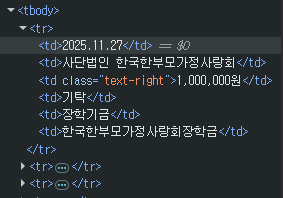

In [10]:
print(td_list[0].text)
print(td_list[1].text)
print(td_list[2].text)
print(td_list[3].text)
print(td_list[4].text)
print(td_list[5].text)

2025.11.27
사단법인 한국한부모가정사랑회
1,000,000원
기탁
장학기금
한국한부모가정사랑회장학금


# 연도 선택하기
화면에 보이는 연도 선택 상자는 마우스로 선택할 수 있다.
근데 자동화된 기능으로 해당 항목을 선택할 수 없다.
커피빈에서 봤던 선택상자와 덕성여대 발전기금에 적용된 선택상자의 형태가 다르다.
(1. 커피빈의 경우 시/도 선택이라는 항목이 보이고, 요소들이 나타난다.
 2. 덕성여대 발전기금은 OO선택이라는 항목 없이 연도 요소들이 바로 나타남.)

웹페이지를 구현해본 사람 HTML이나 CCS를 공부해본 사람은 알텐데....본 강의자는 웹 페이지를 구현해본적이 없다...
그래서 select 태그 형식으로 구현된 항목을 선택하는 것을 찾아보았다....

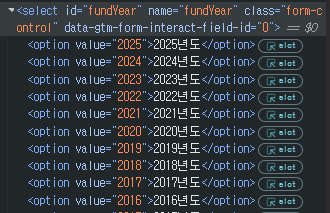

In [20]:
from selenium.webdriver.support.select import Select    # select  tag를 선택하려면 select 를 써야하나보다....

select = Select(driver.find_element(By.CSS_SELECTOR, "#fundYear"))

# 2024년도룰 선택해보자.
#1. 표시된 순번으로 선택하는 방식 index는 0부터 
select.select_by_index(1)

#2. 화면에 보이는 text 내용으로 선택하는 방식
#select.select_by_visible_text('2024년도')

# 3. html 태그에 표신된 value 속성값으로 선택하는 방식
#select.select_by_value('2024')




# 모든 연도 가져오기

In [22]:
option_list = driver.find_elements(By.CSS_SELECTOR, "#fundYear > option")
loop_count = len(option_list)
print(loop_count)

31


In [23]:
# for 문에서 index와 item 을 동시에 가져오는 방
for idx, val in enumerate(option_list):
    print(idx, val)

0 <selenium.webdriver.remote.webelement.WebElement (session="e5b490b164c98525027c46e08d37efe2", element="f.DC148AF859DAAE0DE94887980EFE4A56.d.B3CD8EDE7B2506523B2CCAD9837767AD.e.3702")>
1 <selenium.webdriver.remote.webelement.WebElement (session="e5b490b164c98525027c46e08d37efe2", element="f.DC148AF859DAAE0DE94887980EFE4A56.d.B3CD8EDE7B2506523B2CCAD9837767AD.e.3705")>
2 <selenium.webdriver.remote.webelement.WebElement (session="e5b490b164c98525027c46e08d37efe2", element="f.DC148AF859DAAE0DE94887980EFE4A56.d.B3CD8EDE7B2506523B2CCAD9837767AD.e.3708")>
3 <selenium.webdriver.remote.webelement.WebElement (session="e5b490b164c98525027c46e08d37efe2", element="f.DC148AF859DAAE0DE94887980EFE4A56.d.B3CD8EDE7B2506523B2CCAD9837767AD.e.3711")>
4 <selenium.webdriver.remote.webelement.WebElement (session="e5b490b164c98525027c46e08d37efe2", element="f.DC148AF859DAAE0DE94887980EFE4A56.d.B3CD8EDE7B2506523B2CCAD9837767AD.e.3714")>
5 <selenium.webdriver.remote.webelement.WebElement (session="e5b490b164c985

In [29]:
from selenium.webdriver.support.select import Select    # select  tag를 선택하려면 select 를 써야하나보다....

select = Select(driver.find_element(By.CSS_SELECTOR, "#fundYear"))

sleep_dutation = 0.5

for idx, val in enumerate(option_list):
    print("--------------", val.text)
    select.select_by_index(idx)      # 연도 선택하고 아래 코드에서 "조회"버튼 클릭
    driver.find_element(By.CSS_SELECTOR, "#form > fieldset > div > span > button").click()  
    time.sleep(sleep_dutation) # 의도적으로 일정 시간을 대기하기 위해 설정함.
    
    tr_list = driver.find_elements(By.CSS_SELECTOR, "#devFundList > tbody > tr")

    for tr in tr_list:
        td_list = tr.find_elements(By.CSS_SELECTOR, "td")
        
        print(td_list[0].text)
        print(td_list[1].text)
        print(td_list[2].text)
        print(td_list[3].text)
        print(td_list[4].text)
        print(td_list[5].text)
    

-------------- 2025년도
2025.11.27
사단법인 한국한부모가정사랑회
1,000,000원
기탁
장학기금
한국한부모가정사랑회장학금
2025.11.20
이혜선
1,000,000원
기탁
학과발전기금
생활체육학전공 학과발전기금(생활체육06 동문)
2025.11.14
박은숙
2,000,000원
기탁
학과발전기금
회계학전공 및 현룡전 학과발전기금(회계90 동문)
2025.11.13
김영희
1,000,000원
기탁
장학기금
덕약사랑릴레이장학금(약학76동문)-총동창회 입금
2025.11.13
손판순
700,000원
기탁
장학기금
덕약사랑릴레이장학금(약학65 동문)
2025.11.08
구자은
2,000,000원
기탁
학과발전기금
회계학전공 및 현룡전 학과발전기금(회계90 동문)
2025.11.04
서세리
300,000원
기탁
학과발전기금
국제통상학전공 학과발전기금(국제통상학과08 동문)
2025.10.29
유아교육과 동문회
500,000원
기탁
장학기금
유아교육과 동문회 장학금
2025.10.28
재단법인보건장학회
5,000,000원
기탁
장학기금
보건장학회 장학금
2025.10.23
손은정
500,000원
기탁
학과발전기금
사회복지학전공 학과발전기금(사회복지학전공 교수)
2025.10.22
약학대학 총동문회
4,000,000원
기탁
장학기금
약학대학 총동문회 장학금
2025.10.17
윤한영
15,000,000원
기탁
장학기금
경영학전공 백윤장학금(경영학과 78학번 동문)
2025.10.17
차전원
1,000,000원
기탁
학과발전기금
심리학전공 학과발전기금(심리학과 09학번 동문)
2025.10.01
하이트진로홀딩스 주식회사
4,000,000원
기탁
장학기금
하이트진로홀딩스 장학금
2025.09.29
덕성여자대학교 국어국문학과 교수 일동
1,000,000원
기탁
장학기금
국어국문학전공 발전기금 장학금(김은희 교수 장학금, 이은애 교수 장학금)
2025.09.18
덕성기독인연합회
4,500,000원
기탁
장학기금
덕성기독인연합회 장학금, 누계 83,017천

KeyboardInterrupt: 


KeyboardInterrupt

